In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from hypothesis_tests import NEWCORR, DCOR, HSIC, MIC, HHG
from power import LINEAR, STEP_FUNC, W_SHAPED, SINUSOID, CIRCULAR, HETERO, NOISE_LEVELS

In [2]:
noise_values = torch.arange(NOISE_LEVELS + 1) / NOISE_LEVELS

In [13]:
def make_ax(ax, relationship):
    offset = 0.02

    markers = {
        NEWCORR: "D",
        DCOR: "o",
        HSIC: "+",
        MIC: "^",
        HHG: "x"
    }

    for method in [DCOR, MIC, HSIC, HHG]:
    # for method in [MIC]:
        marker_style = {
            "markerfacecolor" :'w',
            "markeredgecolor":"k",
            "marker": markers[method],
            "markersize": 10,
        }
        powers = np.genfromtxt(f"results/power/{method}_power_{relationship}.txt")
        ax.plot(noise_values, powers, color="k", **marker_style, label=method)
        # for i, power in enumerate(powers):
        #     ax.annotate(f"{power.item():0.2f}", xy=(noise_values[i] + offset, power + offset))

    marker_style = {
        "markerfacecolor" :'w',
        "markeredgecolor":"r",
        "marker": markers[NEWCORR],
        "markersize": 10,
    }

    powers = torch.load(f"results/power/{relationship}_{NEWCORR}_powers.pt")
    ax.plot(noise_values, powers, color="r", **marker_style, label=NEWCORR)
    # for i, power in enumerate(powers):
    #     ax.annotate(f"{power.item():0.2f}", xy=(noise_values[i] + offset, power + offset))

    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    ax.set_title(relationship)
    # ax.set_xlabel("Noise Level")
    ax.set_ylabel("Power")
    ax.legend(loc="upper right")


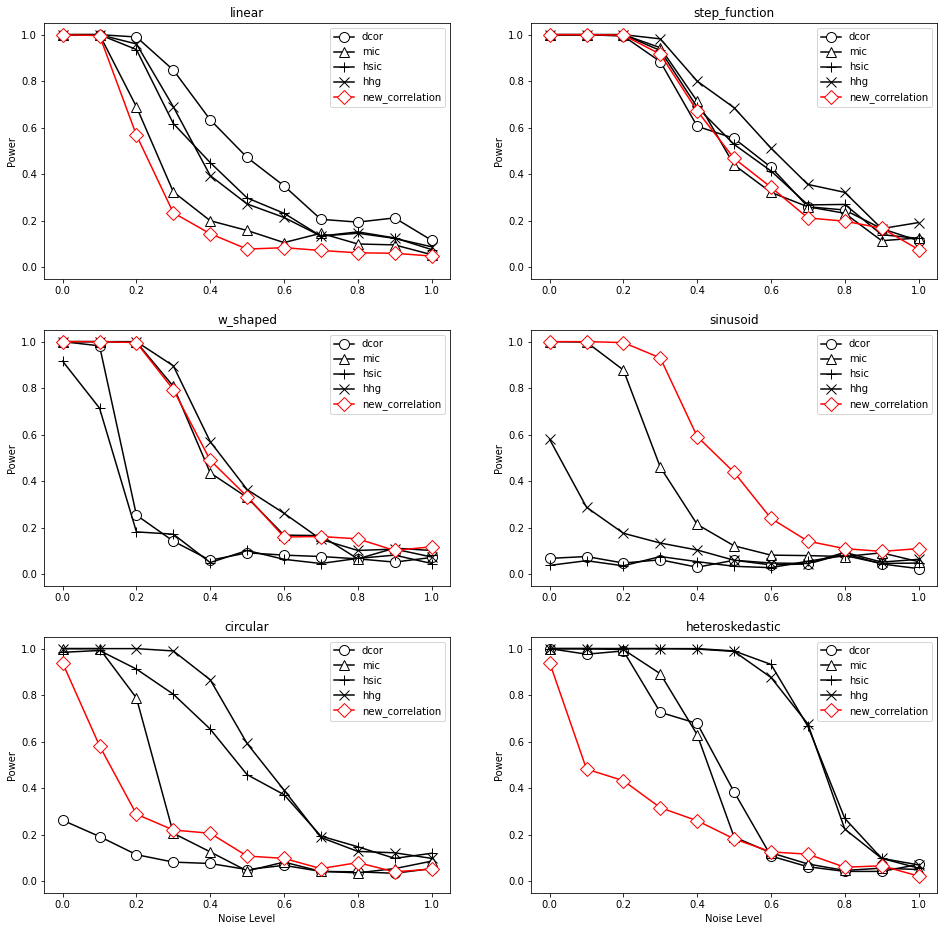

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(16, 11))

make_ax(axes[0, 0], LINEAR)
make_ax(axes[0, 1], STEP_FUNC)
make_ax(axes[1, 0], W_SHAPED)
make_ax(axes[1, 1], SINUSOID)
make_ax(axes[2, 0], CIRCULAR)
make_ax(axes[2, 1], HETERO)

axes[2, 0].set_xlabel("Noise Level")
axes[2, 1].set_xlabel("Noise Level")

# TODO: Subplot adjust.

plt.savefig(f"results/power/figure-5-rep.png", bbox_inches="tight")
plt.show()
plt.close(fig)